Fasdatullah
2209106078
Informatika B2 22


# Preprocessing

# import library dan dataset
import library awal yang dibutuhkan untuk project lalu upload dan read dataset


In [168]:
!wget --no-check-certificate \
https://raw.githubusercontent.com/Soowda/-Praktikum_KB/refs/heads/main/dataset/Crop%20Production%20data.csv \
-O /content/CropProductiondata.csv

--2024-10-17 15:40:13--  https://raw.githubusercontent.com/Soowda/-Praktikum_KB/refs/heads/main/dataset/Crop%20Production%20data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15599620 (15M) [text/plain]
Saving to: ‘/content/CropProductiondata.csv’

/content/CropProduc 100%[===================>]  14.88M  --.-KB/s    in 0.1s    

2024-10-17 15:40:14 (117 MB/s) - ‘/content/CropProductiondata.csv’ saved [15599620/15599620]



In [169]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


df = pd.read_csv('CropProductiondata.csv')

In [170]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# Preprocessing

### Handling Missing Value

In [172]:
df.isna().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [173]:
# Menghitung total data dan missing values
total_data = len(df)
missing_values = df['Production'].isnull().sum()

# Menghitung persentase missing values
percentage_missing = (missing_values / total_data) * 100
print(f"Persentase missing values: {percentage_missing:.2f}%")

Persentase missing values: 1.52%


In [174]:
## Menghapus Missing Value
df = df.dropna(subset=['Production'])
#Cek hasilnya
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


### Handling Duplicate Value

In [175]:
# Melihat jumlah duplicate value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


### Handling Data Anomali

In [176]:
print(df['Season'].unique())

['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ' 'Kharif   ' 'Rabi    ']


In [177]:
# Menghilangkan spasi di awal atau akhir string pada kolom 'Season'
df.loc[:, 'Season'] = df['Season'].str.strip()

# Mengganti nilai yang tidak konsisten
df.loc[:, 'Season'] = df['Season'].replace({
    'Kharif ': 'Kharif',
    'Rabi ': 'Rabi'
})

# Memeriksa hasilnya
print(df['Season'].unique())

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter']


## Data Transformation




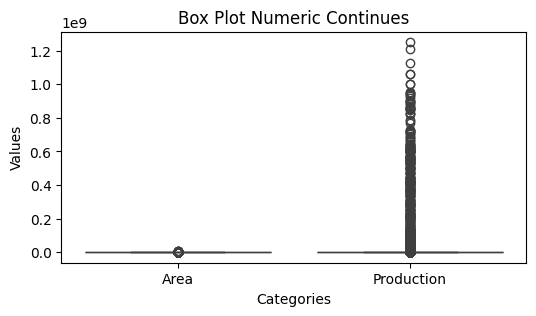

In [178]:
# Create a box plot using Seaborn
plt.figure(figsize=(6, 3))
sns.boxplot(data=df[['Area','Production']])
plt.title('Box Plot')
plt.xlabel('Features')

# Add title and labels
plt.title('Box Plot Numeric Continues')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

Transformation : distribusi data numerik tidak sesuai dengan asumsi model. Terindikasi data sangat skewed. Dalam hal ini, kita bisa melakukan transformasi

In [179]:
import numpy as np

df['Production'] = np.log(df['Production'] + 1)  # Menghindari log(0)

In [180]:
df['Area'] = np.log(df['Area'] + 1)  # Menghindari log(0)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


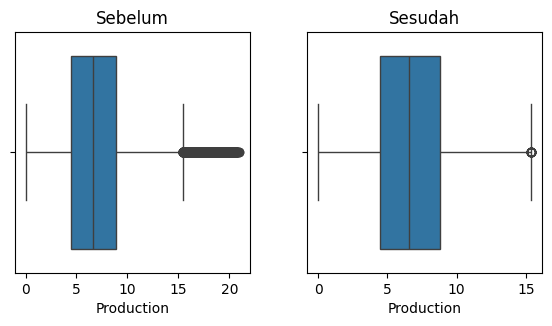

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plt.tight_layout()

# Boxplot sebelum menangani outlier
sns.boxplot(x=df['Production'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Production'].quantile(0.25)
Q3 = df['Production'].quantile(0.75)
IQR = Q3 - Q1

# Mengambil nilai yang tidak dianggap outlier
df = df[~((df['Production'] < (Q1 - 1.5 * IQR)) | (df['Production'] > (Q3 + 1.5 * IQR)))]

# Boxplot setelah menangani outlier
sns.boxplot(x=df['Production'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


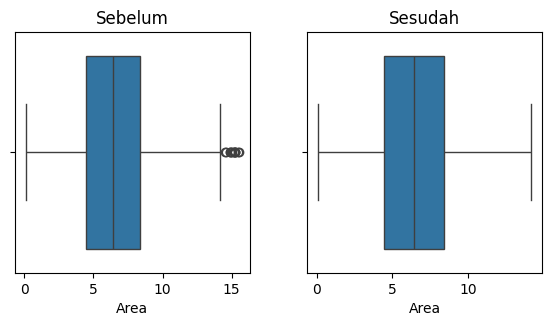

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plt.tight_layout()

# Boxplot sebelum menangani outlier
sns.boxplot(x=df['Area'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

# Mengambil nilai yang tidak dianggap outlier
df = df[~((df['Area'] < (Q1 - 1.5 * IQR)) | (df['Area'] > (Q3 + 1.5 * IQR)))]

# Boxplot setelah menangani outlier
sns.boxplot(x=df['Area'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")

plt.show()

## Scalling

Kita melakukan penskalaan untuk data numeric bertujuan data berada pada rentang 0 - 1. hal ini mempermudah model dalam memahami data

In [183]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Area','Production']] = scaler.fit_transform(df[['Area','Production']])

## Encode
Melakukan encode pada data kategorikal. agar model dapat memahami data

In [184]:
oe = OrdinalEncoder()
df["Crop_Year"] = oe.fit_transform(df[["Crop_Year"]])

In [185]:
le=LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col]=le.fit_transform(df[col])

In [186]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,418,3.0,1,2,0.500719,0.493322
1,0,418,3.0,1,74,0.071364,0.044984
2,0,418,3.0,1,97,0.322884,0.374761
3,0,418,3.0,4,7,0.361395,0.419544
4,0,418,3.0,4,22,0.461295,0.331762


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241478 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     241478 non-null  int64  
 1   District_Name  241478 non-null  int64  
 2   Crop_Year      241478 non-null  float64
 3   Season         241478 non-null  int64  
 4   Crop           241478 non-null  int64  
 5   Area           241478 non-null  float64
 6   Production     241478 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 14.7 MB


# Sequintial Model


model ini memprediksi jumlah produksi maka target kita Y `Production` dan kolom lain dijadikan feature X. Kemudian melakukan split data dan cek shape datanya.

In [188]:
#deklarasi feature dan label
X = df.drop('Production', axis=1)
y = df['Production']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("======= Shape Data ========")
print('  X_train :  ', X_train.shape)
print('  y_train :  ', y_train.shape)
print('  X_test  :  ', X_test.shape)
print('  y_test  :  ', y_test.shape)
print("===========================")


======= Shape Data ========
  X_train :   (193182, 6)
  y_train :   (193182,)
  X_test  :   (48296, 6)
  y_test  :   (48296,)


## Build Model
Membangun sequintial model sederhana untuk regresi dengan 4 layer layer pertama adalah layer input kemudian 2 layer hidden dan terakhir layer output.

In [189]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input Layer dengan 64 unit
    Dense(32, activation='relu'),  # Hidden layer dengan 32 unit
    Dense(16, activation='relu'),  # Hidden Layer dengan 16 unit
    Dense(1) #output layer
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model
Training arsitektur model yang telah dibuat dengan cara mengcompile terlebih dahulu untuk optimezer yang digunakan adalah `'adam'` dan evaluasi menggunakan `mae`. terdapat fungsi callback dari libbrary tensorflow untuk menghentikan pelatihan jika mae tidak bertambah ini bertujuan untuk mencegah ovverfit.

In [190]:
# Compile model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Callback: EarlyStopping untuk menghentikan pelatihan jika mae tidak membaik setelah 5 epoch
early_stop = EarlyStopping(monitor='mae',
                           patience=5,
                           restore_best_weights=True)

# Train model dengan callback
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.1619 - mae: 0.2108 - val_loss: 0.0186 - val_mae: 0.1109
Epoch 2/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0194 - mae: 0.1053 - val_loss: 0.0118 - val_mae: 0.0844
Epoch 3/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0132 - mae: 0.0865 - val_loss: 0.0092 - val_mae: 0.0704
Epoch 4/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0108 - mae: 0.0778 - val_loss: 0.0106 - val_mae: 0.0796
Epoch 5/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0098 - mae: 0.0730 - val_loss: 0.0090 - val_mae: 0.0674
Epoch 6/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0093 - mae: 0.0708 - val_loss: 0.0080 - val_mae: 0.0648
Epoch 7/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0087 - mae: 0.0686 - val_loss: 0.0101 - val_mae: 0.0730
Epoch 8/50
6037/6037 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0086 - mae: 0.0680 - val_loss: 0.0082 - val_mae: 0.0653
Epoch 9/50
6037/6037 ━━━━━━━━━━━

## Evaluasi Model

In [191]:
# Evaluasi model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Loss pada data uji: {test_loss}')
print(f'MAE pada data uji: {test_mae}')


1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0074 - mae: 0.0629
Loss pada data uji: 0.00741232093423605
MAE pada data uji: 0.06305155158042908


Melakukan prediksi untuk 5 data

In [192]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Membuat DataFrame untuk hasil prediksi dan nilai sebenarnya
tabel_prediksi = pd.DataFrame({'Prediksi': y_pred.flatten(),
                               'Nilai Sebenarnya': y_test.values})
tabel_prediksi.head(5)

1510/1510 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,Prediksi,Nilai Sebenarnya
0,0.511343,0.492571
1,0.352075,0.289832
2,0.571656,0.491279
3,0.275162,0.350627
4,0.261060,0.179938
